In [8]:
from tools import *
%matplotlib inline

# Regression Linéaire

### Algorithme
L'algorithme de descente du gradient est un algorithme itératif très utilisé pour optimiser une fonction continue dérivable. Son principe est d'approché pas à pas une solution (localement) optimale, en "suivant" la direction du gradient. A partir d'un point tiré aléatoirement $x_0$, le point est mis à jour itérativement en se déplaçant en direction inverse du gradient de la fonction $f$ :

1. $x_0=random()$
2. $x_{i+1} \leftarrow x_i -\epsilon*\nabla f(x_i)$
3. boucler sur 2.

La classe `OptimFunc` permet d'enregistrer les renseignements nécessaires à l'optimisation d'une fonction $f$ : la fonction elle-même, son gradient, et la dimension de l'entrée. Un exemple est donné ci-dessous dans le cas de la fonction $f(x)$.

In [47]:
class OptimFunc:
    def __init__(self,f=None,grad_f=None,dim=2):
        self.f=f
        self.grad_f=grad_f
        self.dim=dim
    def init(self,low=-1,high=1):
        return random.random(self.dim)*(high-low)+low

def lin_f(x): return x
def lin_grad(x): return 1
lin_optim=OptimFunc(lin_f,lin_grad,1)
#Utiliser la fonction :
lin_optim.f(3)
#le gradient :
lin_optim.grad_f(1)

1

Nous allons utiliser deux fonctions exemples : une à valeur dans R et une valeur dans R2. Nous allons également calculer leur gradient. Avant d'appliquer une descente de gradient, nous definissons les fonctions optimisées de ces fonctions. Nous utilisons également la visualisation de ces fonctions en 2D et 3D.

- $xcosx(x)=x cos(x)$ en dimension 1
- $rosen(x_1,x_2)=100*(x_2-x_1^2)^2+(1-x_1)^2$  en dimension 2
 

In [48]:
#definition des fonctions
def xcos(x):
	return x*np.cos(x)
def rosen(x):
	return 100*(x[1]-x[0]**2)**2+(1-x[0]**2)
#definition des gradients
def grad_rosen(x):
	return np.array([-400*x[0]*(x[1]-x[0]**2)-2*x[0],200*(x[1]-x[0]**2)])
def grad_xcos(x):
	return np.cos(x)+x*np.sin(x)

#definitions des fonctions optimisees
rosen_optim=OptimFunc(rosen,grad_rosen,2)
xcos_optim=OptimFunc(xcos,grad_xcos,1)

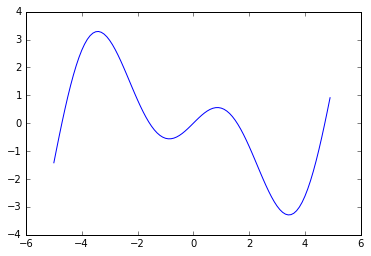

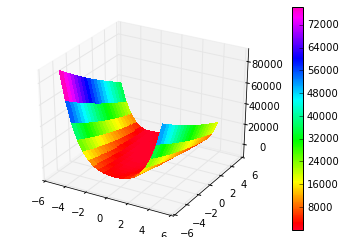

In [49]:
xrange=np.arange(-5,5,0.1)
plt.plot(xrange,xcos_optim.f(xrange))
plt.show()

### affichage 3D
grid,xvec,yvec=make_grid(xmin=-5,xmax=5,ymin=-5,ymax=5)
# z=rosen_optim.f(grid).reshape(xvec.shape)
z=np.apply_along_axis(rosen_optim.f,1,grid).reshape(xvec.shape) #application a tous les axes un par un 
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(xvec, yvec, z, rstride=1, cstride=1, cmap=cm.gist_rainbow,linewidth=0, antialiased=False)
fig.colorbar(surf)
plt.show()


## Descente de gradient

Le code suivant est celui de la descente de gradient et contient plusieurs paramètres :
    - la fonction sur laquelle on applique l'algorithme
    - le pas epsilon
    - le nombre d'iterations
    
Le critère d'arrêt est le nombre maximum d'itérations entré lors de la création d'une descente de gradient (par défaut de 5000 itérations).
Les variables `log_w`, `log_f` et `log_grad` permettent d'enregistrer les valeurs du paramètre d'apprentissage et garder un historique du paramètre d'apprentissage, de la fonction et du gradient de la fonction au cours de l'algorithme itératif (`log` au sens du `log` de la console, ie l'enregistrement des valeurs). Cet enregistrement permet ensuite de tracer les evolutions de ces 3 paramètres en fonction des itérations (et en faisant varier epsilon également).

In [51]:
class GradientDescent:
    def __init__(self,optim_f,eps=1e-4,max_iter=15000):
        self.optim_f=optim_f
        self.eps=eps
        self.max_iter=max_iter
    def reset(self):
        self.i=0
        self.w = self.optim_f.init()
        self.log_w=np.array(self.w)
        self.log_f=np.array(self.optim_f.f(self.w))
        self.log_grad=np.array(self.optim_f.grad_f(self.w))
    def optimize(self,reset=True):
        if reset:
            self.reset()
        while not self.stop():
            self.w = self.w - self.get_eps()*self.optim_f.grad_f(self.w)
            self.log_w=np.vstack((self.log_w,self.w))
            self.log_f=np.vstack((self.log_f,self.optim_f.f(self.w)))
            self.log_grad=np.vstack((self.log_grad,self.optim_f.grad_f(self.w)))
            #if self.i%100==0:
                #print (self.i," iterations ",self.log_f[self.i]),self.score(self.data,self.y),self.w.dot(self.w)
            self.i+=1
    def stop(self):
        return (self.i>2) and (self.max_iter and (self.i>self.max_iter))
    def get_eps(self):
        return self.eps

### Evolution des fonctions selon le nombre d'iterations et le pas

Nous allons tracer les fonctions et leurs valeurs  en fonction du nb d'iterations pour différents Epsilon

#### Fonction xcos

On constate pour la fonction xcos que pour epsilon=10^3 et epsilon=10-4, la descente de gradient diverge. Au contraire, pour des valeurs invférieurs la descente de gradient converge mais demande un grand nombre d'iterations. On ne trouve pas toujours la meme solution en fonction des executions, en effet, on initialise aléatoirement à chaque fois.

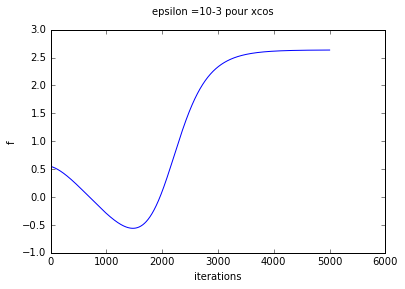

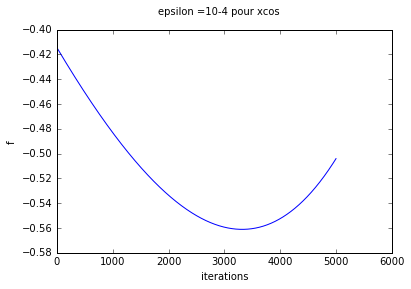

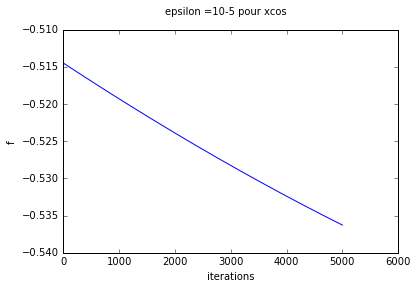

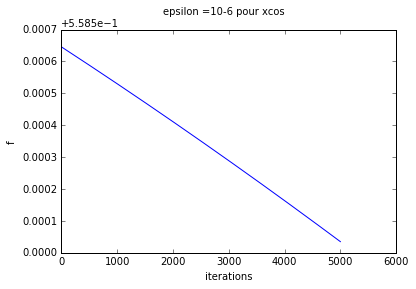

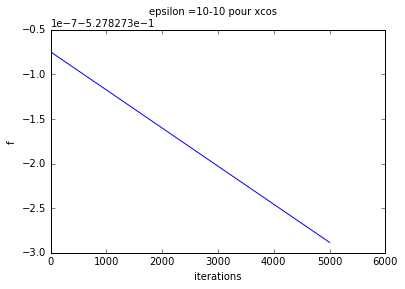

In [52]:
xcos_gd=GradientDescent(xcos_optim,1e-3,5000)
xcos_gd.optimize()
iterr=np.arange(0,xcos_gd.i+1,1)
iterr=iterr[:,np.newaxis]
plt.figure().suptitle('epsilon =10-3 pour xcos')
plt.plot(iterr,xcos_gd.log_f)
plt.ylabel('f')
plt.xlabel('iterations')
plt.show()

xcos_gd=GradientDescent(xcos_optim,1e-4,5000)
xcos_gd.optimize()
iterr=np.arange(0,xcos_gd.i+1,1)
iterr=iterr[:,np.newaxis]
plt.figure().suptitle('epsilon =10-4 pour xcos')
plt.plot(iterr,xcos_gd.log_f)
plt.ylabel('f')
plt.xlabel('iterations')
plt.show()

xcos_gd=GradientDescent(xcos_optim,1e-5,5000)
xcos_gd.optimize()
iterr=np.arange(0,xcos_gd.i+1,1)
iterr=iterr[:,np.newaxis]
plt.figure().suptitle('epsilon =10-5 pour xcos')
plt.plot(iterr,xcos_gd.log_f)
plt.ylabel('f')
plt.xlabel('iterations')
plt.show()

xcos_gd=GradientDescent(xcos_optim,1e-6,5000)
xcos_gd.optimize()
iterr=np.arange(0,xcos_gd.i+1,1)
iterr=iterr[:,np.newaxis]
plt.figure().suptitle('epsilon =10-6 pour xcos')
plt.plot(iterr,xcos_gd.log_f)
plt.ylabel('f')
plt.xlabel('iterations')
plt.show()

xcos_gd=GradientDescent(xcos_optim,1e-10,5000)
xcos_gd.optimize()
iterr=np.arange(0,xcos_gd.i+1,1)
iterr=iterr[:,np.newaxis]
plt.figure().suptitle('epsilon =10-10 pour xcos')
plt.plot(iterr,xcos_gd.log_f)
plt.ylabel('f')
plt.xlabel('iterations')
plt.show()

#### Fonction rosen
On constate pour la fonction rosen qu'un taux d'apprentisage epsilon trop grand (10-3) la descente de gradient ne converge pas, il y a même divergence pour un nombre specifique d'itérations. On constate aussi que pour epsilon=10-4 le gradient converge assez vite. Si on diminute epsilon, il faut plus d'iterations pour qu'il y ait convergence. Epsilon=10-4 est donc un bon taux d'apprentissage pour la fonction rosen.

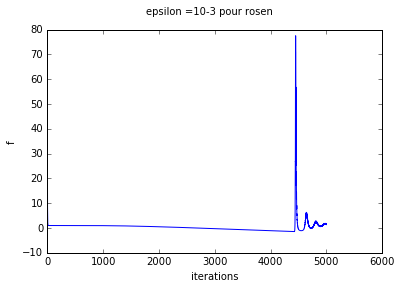

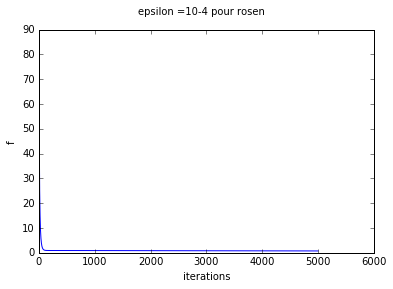

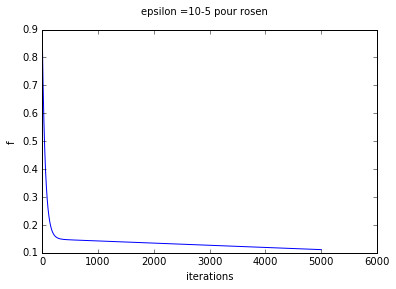

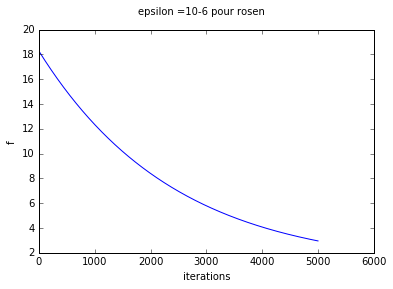

In [53]:
rosen_gd=GradientDescent(rosen_optim,1e-3,5000)
rosen_gd.optimize()
iterr=np.arange(0,xcos_gd.i+1,1)
iterr=iterr[:,np.newaxis]
plt.figure().suptitle('epsilon =10-3 pour rosen')
plt.plot(iterr,rosen_gd.log_f)
plt.ylabel('f')
plt.xlabel('iterations')
plt.show()

rosen_gd=GradientDescent(rosen_optim,1e-4,5000)
rosen_gd.optimize()
iterr=np.arange(0,xcos_gd.i+1,1)
iterr=iterr[:,np.newaxis]
plt.figure().suptitle('epsilon =10-4 pour rosen')
plt.plot(iterr,rosen_gd.log_f)
plt.ylabel('f')
plt.xlabel('iterations')
plt.show()

rosen_gd=GradientDescent(rosen_optim,1e-5,5000)
rosen_gd.optimize()
iterr=np.arange(0,xcos_gd.i+1,1)
iterr=iterr[:,np.newaxis]
plt.figure().suptitle('epsilon =10-5 pour rosen')
plt.plot(iterr,rosen_gd.log_f)
plt.ylabel('f')
plt.xlabel('iterations')
plt.show()

rosen_gd=GradientDescent(rosen_optim,1e-6,5000)
rosen_gd.optimize()
iterr=np.arange(0,xcos_gd.i+1,1)
iterr=iterr[:,np.newaxis]
plt.figure().suptitle('epsilon =10-6 pour rosen')
plt.plot(iterr,rosen_gd.log_f)
plt.ylabel('f')
plt.xlabel('iterations')
plt.show()

## Régression linéaire

Etant donné un ensemble de $n$ points en $d$ dimensions et leurs valeurs cibles  $\{(x^i,y^i)\}\in X\times Y \subset \mathbb{R}^d\times \mathbb{R}$, le problème de la régression linéaire est de trouver une fonction linéaire $f : X \to Y$ qui minimise l'erreur quadratique $\sum_i \frac{1}{2n}(f(x^i)-y^i)^2$. La fonction $f$ étant linéaire, on peut la paramétriser par $\mathbf{w} \in \mathbb{R}^{d+1}$ : $f_\mathbf{w}(x)=\sum_{i=1}^d w_i x_i+w_0$. L'objectif est alors de trouver $\mathbf{w}$ qui minimise l'erreur quadratique. 
La fonction `gen_1d(n,eps)` engendre $n$ données 1D selon la droite $f(x)=2*x+1$ bruitée avec un bruit gaussien de variance `eps`.

In [54]:
def gen_1d(n,eps):
    x=np.random.random(n)
    L=2*x+1+np.random.normal(0,eps,n)
    return np.transpose(np.vstack((x,L)))
data=gen_1d(100,0.1)

Le calcul matriciel pour $ f_w$ est $f_w=w^{ T}*x+w_0$. La fonction à utiliser pour ce calculer est `f_w=np.dot(w,x)`.
La fonction à optimiser est $\sum_i \frac{1}{2n}(f_w(x^i)-y^i)^2$. La descente de gradient est utilisée ici pour diminuer l'erreur quadratique. On calcule donc $f_w$ et son gradient puis on utilise les méthodes hérités de la classe de descente de gradient `self.optimize()`. 

On utilise ensuite une classe héritée de la descente de gradient pour la régréssion linéaire. Cette classe contient une méthode de prédicition. Puis nous allons tester la classe sur les données engendrées auparavant.

In [56]:
class Regression(Classifier,GradientDescent,OptimFunc):
    def __init__(self,eps=1e-4,max_iter=20000):
        GradientDescent.__init__(self,self,eps,max_iter)
        self.dim=self.data=self.y=self.n=self.w=None
    def fit(self,data,y):
        self.y=y
        self.n=y.shape[0]
        self.dim=data.size/self.n+1
        self.data=data.reshape((self.n,self.dim-1))
        self.data=np.hstack((np.ones((self.n,1)),self.data))
        self.optimize()
    def f(self,w):
        a=[((self.data[i,:]*w)-self.y[i])**2 for i in range(self.n)]
        return (1/(2*self.n))*sum(a)
    def grad_f(self,w):
        b=[((self.data[i,:]*w)-self.y[i])*self.data[i,:] for i in range(self.n)]
        return (1/self.n)*sum(b)
    def init(self):
        return np.random.random(self.dim)*(np.max(self.data)-np.min(self.data))+np.min(self.data)
    def predict(self,data):
        n=data.size/(self.dim-1)
        return np.hstack((np.ones((n,1)),data.reshape(n,self.dim-1))).dot(self.w)

/Users/alexandreattia/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:9: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/alexandreattia/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:19: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


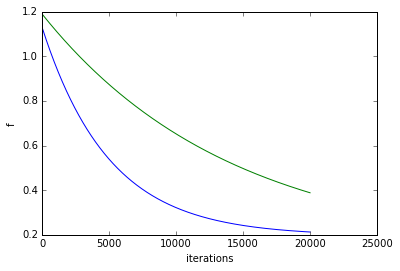

In [57]:
test=Regression()
test.fit(data[:,0],data[:,1])
iterr=np.arange(0,test.i+1,1)
iterr=iterr[:,np.newaxis]
plt.plot(iterr,test.log_f)
plt.ylabel('f')
plt.xlabel('iterations')
plt.show()

On constate bien que au cours des itérations l'erreur diminue pour au final tendre vers une valeur limite. La descente de gradient est donc fonctionnelle et l'algorithme apprend au fur et à mesure des itérations ie l'erreur de l'algorithme diminue au fur à mesure des itérations. 

# Algorithme du perceptron

Ce TD est consacré à l'étude du perceptron. 
Cet algorithme a une longue histoire et est la base des réseaux de neurones. Il peut être vu comme une descente du gradient sur un coût particulier, le **hinge loss**, même si historiquement son inspiration est de nature biologique.

## Principe

On se place dans le cadre de la classification binaire : on considère deux labels, $Y=\{-1/+1\}$, et un ensemble de données $\{(x^i,y^i)\}\in X\times Y \subset \mathbb{R}^d\times Y$. 
On cherche une fonction $f$ qui permette de **généraliser** l'ensemble des données et de faire le moins d'erreurs sur l'ensemble disponible. Nous nous plaçons toujours dans le cadre linéaire - $f$ est en fait paramétrisée par un vecteur $w$ dit de poids, $f_w(x)= <w,x> +w_0= \sum_i w_i x_i+w_0$ , et la classification est faite  en considérant le signe de $f_w(x)$ : le label prédit par $f$ pour $x$ est $sign(f_w(x))$.

Le coût qui nous intéresse en classification est l'erreur $0/1$, qui compte une erreur lorsque le label prédit est différent de l'attendu : $l(f_w(x),y)=\mathbf{1}_{sign(f_w(x))\not = y}$, l'objectif étant de trouver la fonction - le paramètrage $w$ - qui minimise ce coût sur l'ensemble des données (la fonction qui fait le moins d'erreurs, cf minimisation du risque empirique). 
Cependant ce coût est difficile à optimiser (pourquoi ?). 
Afin de pouvoir optimiser le paramètre $w$, on étudie un coût appelé dans le cadre général *hinge loss* : $l_\alpha(f_w(x),y)= max(0,\alpha-y f_w(x))$.
Dans le cas du perceptron, on prend $\alpha = 0$.

L'algorithme du perceptron est le suivant :

- Choisir $w_0$ au hasard
- Tant que non convergence
    * mise à jour de $w_t$ :
      $w_{t+1} = w_t +\epsilon \sum_{(x,y)} yx\mathbf{1}_{sign(yf_w(x))<0} $



1. En fonction de $sign(f_w(x))y$, quand une mise à jour est-elle vraiment effectuée ? Quelle signification pour l'erreur sur cet exemple $x$ ? Quel rapport entre $\nabla_w l_0(f_w(x),y)$ et la mise à jour de $w$ ? Montrez que cet algorithme revient à un algorithme de descente de gradient.

2. Complétez le code ci-dessous : codez une fonction `hinge(w,data,y,alpha=0)` qui renvoie l'erreur hinge moyenne pour un vecteur de poids `w`, une matrice d'exemples `data`, un vecteur de label `y` et un paramètre $\alpha$. Codez une fonction `hinge_grad(w,data,y,alpha=0)` qui renvoie le gradient moyen pour les mêmes paramètres.
 

### Notes

Dans le code suivant, nous definissons la fonction coût et son gradient. Pour ceci, nous transformons les vecteurs de sorte qu'on puisse opérer dessus (n'avoir que des vecteurs colonnes ou que des vecteurs lignes). Puis à l'aide de ses vecteurs, nous calculons la fonction coût grâce à une moyenne sur les différents élements de ce vecteur. Le vecteur est calculé après la demonstration plus bas. Nous utilisons le même raisonnement pour le gradient.

In [9]:
def hinge(w,data,y,alpha=0):
    if len(data.shape)==1:
        data=data.reshape(1,data.shape[0]) ##colum vector to lign vector
    if len(w.shape)==1:
        w=w.reshape(1,w.shape[0])
    if len(y.shape)==1:
        y=y.reshape(y.shape[0],1)
    return np.mean(np.maximum(0,-y*(data.dot(np.transpose(w)))))

def hinge_grad(w,data,y,alpha=0):
    if len(data.shape)==1:
        data=data.reshape(1,data.shape[0])
    if len(w.shape)==1:
        w=w.reshape(1,w.shape[0])
    if len(y.shape)==1:
        y=y.reshape(y.shape[0],1)
    return np.mean(-(y*data)*(-y*data.dot(np.transpose(w))>0),axis=0)
    

w = np.random.random((1,3))
data = np.random.random((100,3))
y = np.random.randint(0,2,size = (100,1))*2-1

#### doit retourner un scalaire
print (hinge(w,data,y), hinge(w,data[0],y[0]), hinge(w,data[0,:],y[0]))
### doit retourner un vecteur de taille (w.shape[1],)
print (hinge_grad(w,data,y),hinge_grad(w,data[0],y[0]),hinge_grad(w,data[0,:],y[0]))

0.247683438399 0.906272740708 0.906272740708
[ 0.22743802  0.1957197   0.18568129] [ 0.332108    0.24931683  0.94488731] [ 0.332108    0.24931683  0.94488731]


### Notes

La mise à jour de l'algorithme du perceptron (mise à jour semblable à celle d'une descente de gradient) est effectuée lorsque $sign(f_w(x))\not = y$. Cela signifie, en effet, que la prédiction réalisé par l'algorithme est mauvaise. La classification est mauvaise. Effectviement, y=-1 ou 1 ie positif ou negatif, la prédiction realisé est donc pertinente selon son signe. Si la prédiction est bonne, cela signifique que $y$ et $f_w(x)$ ont le meme signe ie classifié dans le meme groupe. Donc la mise à jour est effectué uniquement losque $f_w(x)$ et y sont de signes contraires ie lorsque $sign(f_w(x)y)<0$. L'erreur est donc $l(f_w(x),y)=\mathbf{1}_{sign(f_w(x)y)<0}$ .



$f_w(x)= \sum_i w_i x_i+w_0$

$l(f_w(x),y)=\mathbf{1}_{sign(f_w(x))\not y}$

->$l(f_w(x),y)=\mathbf{1}_{sign(f_w(x)y)<0}$

-> $w_{t+1} = w_t +\epsilon \sum_{(x,y)} yx\mathbf{1}_{sign(yf_w(x))<0} $

<b>Demonstration </b>: 

-> $\nabla_w l(f_w(x),y)=\sum_{(x,y)} yx\mathbf{1}_{sign(yf_w(x))<0}$

->$\nabla_w l_0(f_w(x),y)=\nabla_w(max(0,-yf_w(x)))=\nabla_w(max(0,-y <w,x>) ) $ 

- Si $-y<w,x>>0$, ie MAJ,

$\nabla_w l_0(f_w(x),y)=\nabla_w(-y <w,x>)=- \sum yx$ 

- Si $-y<w,x><0$, ie non MAJ,

$\nabla_w l_0(f_w(x),y)=0$ 

d'où

$\nabla_w l_0(f_w(x),y)=-\sum_{(x,y)} yx\mathbf{1}_{sign(yf_w(x))<0} $

### Perceptron

Le code suivant est la classe pour le perceptron avec ses différents paramètres

- le paramètre `eps` représente le pas d'apprentissage $\epsilon$;
- le paramètre `max_iter` le nombre d'itérations;
- la méthode `fit(data,y)` permet d'entraîner le perceptron sur les données en paramètres;
- la méthode `predict(data)` renvoie les labels prédits sur les données. On utilise pour ceci la démonstration précédente avec le signe de la prédiction, pour que la prédiciton est le m^me signe que y. On utilise également des transformations en ligne ou colonne pour pouvoir réaliser des opérations sur les vecteurs;
- la méthode `score(data,y)` renvoie le pourcentage de bonnes classifications en prédiction pour les données `data` par rapport aux labels  `y`. Pour ceci, on utilise l'indicatrice qui vérifie si la prédiction et le label y ont le même signe. Le score est un pourcentage de reussite. Il est donc de 1, lorsque toutes les prédictions sont bonnes. Ce score est réalisé de manière similaire aux opérations précédentes, ie avec la moyenne sur un vecteur.



In [11]:
class Perceptron:
    def __init__(self,max_iter = 1000,eps=1e-3):
        self.max_iter = max_iter
        self.eps = eps

    def fit(self,data,y):
        self.w = np.random.random((1,data.shape[1]))
        self.hist_w  = np.zeros((self.max_iter,data.shape[1]))
        self.hist_f = np.zeros((self.max_iter,1))
        self.i=0
        while self.i < self.max_iter :
            self.w = self.w -self.eps*hinge_grad(self.w,data,y)
            self.hist_w[self.i]=self.w
            self.hist_f[self.i]=hinge(self.w,data,y)
            if self.i % 100==0: print (self.i,self.hist_f[self.i])
            self.i+=1

    def predict(self,data):
        if len(data.shape)==1:
            data=data.reshape(1,data.shape[0])
        if len(self.w.shape)==1:
            self.w=self.w.reshape(1,self.w.shape[0])
        return np.sign(data.dot(np.transpose(self.w)))
    
    def score(self,data,y):
        if len(data.shape)==1:
            data=data.reshape(1,data.shape[0])
        if len(self.w.shape)==1:
            self.w=self.w.reshape(1,self.w.shape[0])
        if len(y.shape)==1:
            y=y.reshape(y.shape[0],1)
        return np.mean((y*data.dot(np.transpose(self.w))>0))
        

## Expérimentations  sur des données artificielles 2d
Le code suivant  permet de générer 3 types de données artificielles 2d (paramètre `data_type`). La fonction `plot_data` permet de tracer un graphe des données et `plot_frontiere` la frontière de décision pour une fonction de décision passée en paramètre.

In [12]:
def gen_arti(centerx=1,centery=1,sigma=0.1,nbex=1000,data_type=0,eps=0.02):
    """ Generateur de donnees,
        :param centerx: centre des gaussiennes
        :param centery:
        :param sigma: des gaussiennes
        :param nbex: nombre d'exemples
        :param data_type: 0: melange 2 gaussiennes, 1: melange 4 gaussiennes, 2:echequier
        :param eps: bruit dans les donnees
        :return: data matrice 2d des donnnes,y etiquette des donnnees
    """
    if data_type==0:
        #melange de 2 gaussiennes
        xpos=np.random.multivariate_normal([centerx,centerx],np.diag([sigma,sigma]),int(nbex/2))
        xneg=np.random.multivariate_normal([-centerx,-centerx],np.diag([sigma,sigma]),int(nbex/2))
        data=np.vstack((xpos,xneg))
        y=np.hstack((np.ones(int(nbex/2)),-np.ones(int(nbex/2))))
    if data_type==1:
        #melange de 4 gaussiennes
        xpos=np.vstack((np.random.multivariate_normal([centerx,centerx],np.diag([sigma,sigma]),int(nbex/4)),np.random.multivariate_normal([-centerx,-centerx],np.diag([sigma,sigma]),int(nbex/4))))
        xneg=np.vstack((np.random.multivariate_normal([-centerx,centerx],np.diag([sigma,sigma]),int(nbex/4)),np.random.multivariate_normal([centerx,-centerx],np.diag([sigma,sigma]),int(nbex/4))))     
        data=np.vstack((xpos,xneg))
        y=np.hstack((np.ones(int(nbex/2)),-np.ones(int(nbex/2))))

    if data_type==2:
        #echiquier
        data=np.reshape(np.random.uniform(-4,4,2*nbex),(nbex,2))
        y=np.ceil(data[:,0])+np.ceil(data[:,1])
        y=2*(y % 2)-1
    # un peu de bruit
    data[:,0]+=np.random.normal(0,eps,nbex)
    data[:,1]+=np.random.normal(0,eps,nbex)
    # on mélange les données
    idx = np.random.permutation((range(y.size)))
    data=data[idx,:]
    y=y[idx]
    return data,y

def plot_data(data,labels=None):
    """
    Affiche des donnees 2D
    :param data: matrice des donnees 2d
    :param labels: vecteur des labels (discrets)
    :return:
    """
    cols,marks = ["red", "green", "blue", "orange", "black", "cyan"],[".","+","*","o","x","^"]
    if labels is None:
        plt.scatter(data[:,0],data[:,1],marker="x")
        return
    for i,l in enumerate(sorted(list(set(labels.flatten())))):
        plt.scatter(data[labels==l,0],data[labels==l,1],c=cols[i],marker=marks[i])



def make_grid(data=None,xmin=-5,xmax=5,ymin=-5,ymax=5,step=20):
    """ Cree une grille sous forme de matrice 2d de la liste des points
    :param data: pour calcluler les bornes du graphe
    :param xmin: si pas data, alors bornes du graphe
    :param xmax:
    :param ymin:
    :param ymax:
    :param step: pas de la grille
    :return: une matrice 2d contenant les points de la grille
    """
    if data is not None:
        xmax, xmin, ymax, ymin = np.max(data[:,0]),  np.min(data[:,0]), np.max(data[:,1]), np.min(data[:,1])
    x, y =np.meshgrid(np.arange(xmin,xmax,(xmax-xmin)*1./step), np.arange(ymin,ymax,(ymax-ymin)*1./step))
    grid=np.c_[x.ravel(),y.ravel()]
    return grid, x, y


def plot_frontiere(data,f,step=20):
    """ Trace un graphe de la frontiere de decision de f
    :param data: donnees
    :param f: fonction de decision
    :param step: pas de la grille
    :return:
    """
    grid,x,y=make_grid(data=data,step=step)
    plt.contourf(x,y,f(grid).reshape(x.shape),colors=('gray','blue'),levels=[-1,0,1])


### Mélange de deux gaussiennes

Le code suivant permet d'engendrer des données, apprendre un perceptron et tracer une la frontiere de decision (la frontière est tracée en discrétisant l'espace par une grille et en calculant pour chaque point de la grille le label prédit).
Nous allons essayer trois valeurs de epsilon pour voir si la séparation est possible. Objectivement, la séparation entre deux gaussiennes devrait être entièrement possible si elles ont des ecarts types pas trop élévés.
On constate ici que plus epsilon est petit, moins les gaussiennes sont étendues sur le graphique donc plus la séparation est possible car elles ne sont pas centrées au même point.
Dans le dernier cas (où elles sont plus répandues), quelques points sont du mauvais côté de la frontière de décision. Ce sont ces points qui diminuent le score. Plus ils sont loins de la frontière de décision, plus leur poids dans la descente du score est important.
Dans le cas où espilon est égal à 0,1 avec deux gausiennes, les données sont parfaitement separables. Dans le cas où espilon est égal à 0,5 avec deux gausiennes, les données sont quasiment entierement séparables (993/1000).

0 [ 0.]
100 [ 0.]
200 [ 0.]
300 [ 0.]
400 [ 0.]
500 [ 0.]
600 [ 0.]
700 [ 0.]
800 [ 0.]
900 [ 0.]
1.0


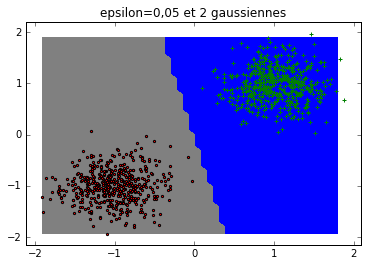

0 [ 0.]
100 [ 0.]
200 [ 0.]
300 [ 0.]
400 [ 0.]
500 [ 0.]
600 [ 0.]
700 [ 0.]
800 [ 0.]
900 [ 0.]
1.0


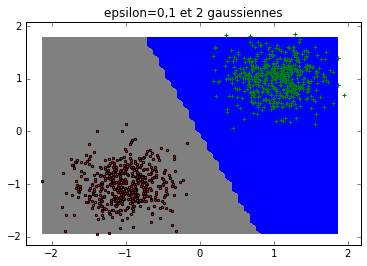

0 [ 0.00200667]
100 [ 0.00154987]
200 [ 0.00133354]
300 [ 0.0012079]
400 [ 0.00110787]
500 [ 0.00100785]
600 [ 0.00090783]
700 [ 0.0008078]
800 [ 0.00070778]
900 [ 0.00060775]
0.993


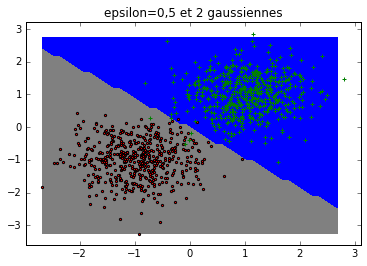

In [21]:
### Generer et tracer des donnees 
datax,datay = gen_arti(centerx=1,centery=1,data_type=0,nbex=1000,eps=0.05)
p = Perceptron(eps=5e-2,max_iter=1000)
p.fit(datax,datay)
print (p.score(datax,datay))
plot_frontiere(datax,p.predict,50)
plot_data(datax,datay)
plt.title("epsilon=0,05 et 2 gaussiennes")
plt.show()

### Generer et tracer des donnees 
datax,datay = gen_arti(data_type=0,nbex=1000,eps=0.1)
p = Perceptron(eps=1e-1,max_iter=1000)
p.fit(datax,datay)
print (p.score(datax,datay))
plot_frontiere(datax,p.predict,50)
plot_data(datax,datay)
plt.title("epsilon=0,1 et 2 gaussiennes")
plt.show()

### Generer et tracer des donnees 
datax,datay = gen_arti(data_type=0,nbex=1000,eps=0.5)
p = Perceptron(eps=5e-1,max_iter=1000)
p.fit(datax,datay)
print (p.score(datax,datay))
plot_frontiere(datax,p.predict,50)
plot_data(datax,datay)
plt.title("epsilon=0,5 et 2 gaussiennes")
plt.show()

Ici, nous allons décentré les gaussiennes, il devient donc impossible de les séparer et nous obtenons le score d'un classifieur classique ie 50%.

0 [ 0.15401947]
100 [ 0.06751161]
200 [ 0.0002945]
300 [ 0.00050167]
400 [ 0.0005634]
500 [ 0.00040956]
600 [ 0.00023638]
700 [ 0.00033141]
800 [ 0.00050126]
900 [ 0.00056544]
0.498


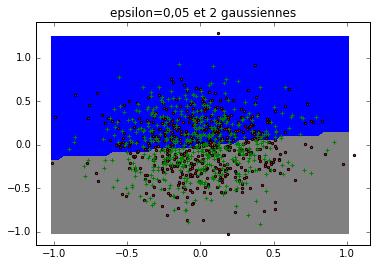

In [22]:
### Generer et tracer des donnees 
datax,datay = gen_arti(centerx=0,centery=1,data_type=0,nbex=1000,eps=0.05)
p = Perceptron(eps=5e-2,max_iter=1000)
p.fit(datax,datay)
print (p.score(datax,datay))
plot_frontiere(datax,p.predict,50)
plot_data(datax,datay)
plt.title("epsilon=0,05 et 2 gaussiennes")
plt.show()

### Mélange de 4 gaussiennes

Le code suivant permet d'engendrer des données, apprendre un perceptron et tracer une la frontiere de decision (la frontière est tracée en discrétisant l'espace par une grille et en calculant pour chaque point de la grille le label prédit).
Nous allons essayer deux valeurs de epsilon pour voir si la séparation est possible. Objectivement, la séparation entre quatres gaussiennes devrait être impossible, nous devrions donc obtenir un score de 50% comme celui d'un classifieur classique. Si les gaussiennes sont bien reparties, nous pouvons obtenir ce score de 50%. Si les gaussiennes sont étendus avec des ecarts types importants, nous devrions avoir un score plus faible.
On constate ici que plus epsilon est petit, moins les gaussiennes sont étendues sur le graphique donc plus la séparation est possible.

0 [ 0.37085847]
100 [ 0.01214808]
200 [ 0.01067053]
300 [ 0.01033665]
400 [ 0.01009817]
500 [ 0.01011749]
600 [ 0.01011342]
700 [ 0.0101327]
800 [ 0.01011394]
900 [ 0.01013323]
0.5


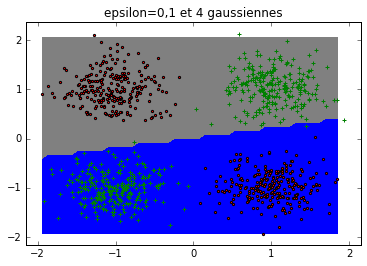

0 [ 0.03953571]
100 [ 0.10846493]
200 [ 0.09674378]
300 [ 0.0755756]
400 [ 0.02314447]
500 [ 0.06850084]
600 [ 0.11207818]
700 [ 0.02712239]
800 [ 0.01116804]
900 [ 0.03795947]
0.494


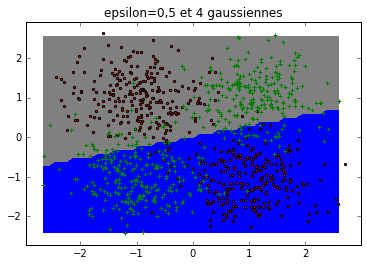

In [23]:
### Generer et tracer des donnees 
datax,datay = gen_arti(data_type=1,nbex=1000,eps=0.1)
p = Perceptron(eps=1e-1,max_iter=1000)
p.fit(datax,datay)
print (p.score(datax,datay))
plot_frontiere(datax,p.predict,50)
plot_data(datax,datay)
plt.title("epsilon=0,1 et 4 gaussiennes")
plt.show()

### Generer et tracer des donnees 
datax,datay = gen_arti(data_type=1,nbex=1000,eps=0.5)
p = Perceptron(eps=5e-1,max_iter=1000)
p.fit(datax,datay)
print (p.score(datax,datay))
plot_frontiere(datax,p.predict,50)
plot_data(datax,datay)
plt.title("epsilon=0,5 et 4 gaussiennes")
plt.show()

### Echequier

Le code suivant permet d'engendrer des données, apprendre un perceptron et tracer une la frontiere de decision (la frontière est tracée en discrétisant l'espace par une grille et en calculant pour chaque point de la grille le label prédit).
Nous allons essayer une valeur de epsilon pour voir si la séparation est possible. La séparation avec un échequier est impossible, si ce dernier est bien centré est bien répandu, nous obtiendrons un score d'environ 50%.
On constate ici que plus epsilon est petit, moins les gaussiennes sont étendues sur le graphique donc plus la séparation est possible.
Epsilon n'a quasiment aucune influence sur le score, les différences de score se font à cause d'un tirage aléatoire.

0 [ 0.15807202]
100 [ 0.21707348]
200 [ 0.18914628]
300 [ 0.23368632]
400 [ 0.43733571]
500 [ 0.4368999]
600 [ 0.43662538]
700 [ 0.4372385]
800 [ 0.43877508]
900 [ 0.44301719]
0.498


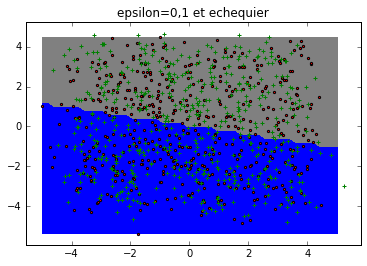

0 [ 0.76069766]
100 [ 0.01882979]
200 [ 0.0407038]
300 [ 0.08803533]
400 [ 0.02022987]
500 [ 0.01109885]
600 [ 0.01752392]
700 [ 0.00499964]
800 [ 0.03423672]
900 [ 0.02738996]
0.494


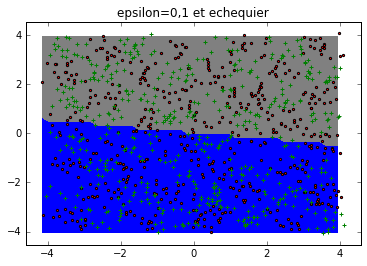

In [30]:
### Generer et tracer des donnees 
datax,datay = gen_arti(data_type=2,nbex=1000,eps=0.5)
p = Perceptron(eps=5e-1,max_iter=1000)
p.fit(datax,datay)
print (p.score(datax,datay))
plot_frontiere(datax,p.predict,50)
plot_data(datax,datay)
plt.title("epsilon=0,1 et echequier")
plt.show()

### Generer et tracer des donnees 
datax,datay = gen_arti(data_type=2,nbex=1000,eps=0.1)
p = Perceptron(eps=1e-1,max_iter=1000)
p.fit(datax,datay)
print (p.score(datax,datay))
plot_frontiere(datax,p.predict,50)
plot_data(datax,datay)
plt.title("epsilon=0,1 et echequier")
plt.show()

Données inséparables avec l'echequier



2. Que représente l'erreur du hinge d'un point de vue géométrique ? et le vecteur de poids $w$ ?

3. Essayez d'apprendre des gaussiennes non centrées. La performance est-elle bonne ? Dans le cas négatif, avez-vous pensez à implémenter le biais (le poids $w_0$) ? que représente ce biais ?

4. Implémentez la version stochastique du perceptron : à chaque mise-à-jour, un exemple est tiré au hasard et la correction n'est effectuée que par rapport à cet exemple. Testez dans le cas bruité. Que remarquez vous sur le nombre de mise-à-jour à effectuer ?

## Données USPS (chiffres manuscrits)

Expérimentez votre perceptron sur des données de [chiffres manuscrits à télécharger](http://webia.lip6.fr/~mapsi/uploads/Cours/2015_tme3_usps_train.txt). Chaque exemple correspond à un chiffre manuscrit sur une matrice 16x16 (description sur un vecteur de taille 256), où chaque valeur indique la luminosité du pixel. 

Le code suivant permet de charger le fichier usps est d'afficher la première image de ce fichier avec son label.

6


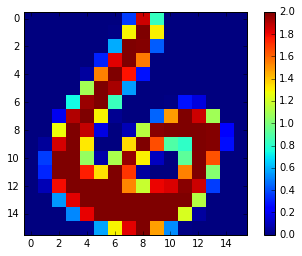

In [37]:
def  load_usps(filename):
    with open(filename ,"r") as f:
        f.readline()
        data = [[float(x) for x in l.split()] for l in f if len(l.split())>2]
    tmp = np.array(data)
    return tmp[:,1:],tmp[:,0].astype(int)
datax,y = load_usps("usps.txt")
plt.imshow(datax[0].reshape((16,16)),interpolation="nearest")
plt.colorbar()
print(y[0])

## Séparation de deux classes de chiffres

Le code suivant permet de classifier les images du fichier usps en séparant deux chiffres, ie deux classes. Ici, nous allons séparer les 6 et 9. Pour ceci nous chargons tous les 6 et 9 (toutes les images dont le label est 6 ou 9). Puis nous creéons un fichier de labels avec deux classes possibles -1 pour les 6 et +1 pour les 9.
Nous utilisons ensuite l'algorithme du perceptron, qui permet de différencier ces deux classes. Nous avons utiliser des labels -1 et +1 pour que les signes soient bien différents pour que le perceptron puisse fonctionner.
Nous constatons que le score est de 98%, donc la classification est bien réussie.

In [38]:
perc = Perceptron(eps=1e-2,max_iter=1000)

#Differencier 6 et 9
usps_6 = datax[y==6]
usps_9 = datax[y==9]
data=np.vstack((usps_6,usps_9))

label_6= -1*np.ones((len(usps_6),1))
label_9=np.ones((len(usps_9),1))
label=np.vstack((label_6,label_9))

perc.fit(data,label)
perc.score(data,label)
print("Le score est ",perc.score(data,label))

0 [ 32.31766887]
100 [ 1.92415404]
200 [ 0.40436854]
300 [ 0.23002529]
400 [ 0.1604649]
500 [ 0.11716834]
600 [ 0.08949237]
700 [ 0.07406078]
800 [ 0.06589389]
900 [ 0.0593958]
Le score est  0.984709480122


## Séparation d'une classe contre les autres. One vs All

Le code suivant permet de classifier les images du fichier usps en séparant un chiffres de tous les autres. On utilise pour ceci la méthode One vs All, ie qu'on affecte un label au chiffre choisi et un autre pour tous les autres classes reunies. Ici, nous allons séparer les 6 des autres chiffres.Nous chargons tous les 6 et tous les chiffres non 6 (toutes les images dont le label est 6 ou n'est pas 6). Puis nous creéons un fichier de labels avec deux classes possibles -1 pour les 6 et +1 pour les non 6.
Nous utilisons ensuite l'algorithme du perceptron, qui permet de différencier ces deux classes. Nous avons utiliser des labels -1 et +1 pour que les signes soient bien différents pour que le perceptron puisse fonctionner.
Nous constatons que le score est de 95%, donc la classification est bien réussie. Nous pouvons également constater que le chargement est plus long par rapport au calcul précédent car il y a plus d'images à charger.

In [41]:
perc = Perceptron(eps=1e-2,max_iter=1000)

#Differencier 6 et tout
usps_6 = datax[y==6]
usps_not6 = datax[y!=6]
data=np.vstack((usps_6,usps_not6))

label_6= -1*np.ones((len(usps_6),1))
label_not6=np.ones((len(usps_not6),1))
label=np.vstack((label_6,label_not6))

perc.fit(data,label)
perc.score(data,label)
print("Le score est ",perc.score(data,label))

0 [ 5.79321223]
100 [ 4.70068694]
200 [ 3.60816165]
300 [ 2.51563636]
400 [ 1.42311107]
500 [ 0.59692674]
600 [ 0.38208771]
700 [ 0.31090166]
800 [ 0.27127896]
900 [ 0.23905827]
Le score est  0.961322178028


### Vecteur de motifs

Nous allons ici tracer le vecteur poids obtenu apres apprentissage. En effet, la feature map (ou vecteur des motifs) a appris les pixels qui caracterisaient le 6 en leur associant une valeur négative. Nous avons séparé les 6 des autres chiffres et nous avons associé une valeur négative du poids associé au pixel caracterisant le 6.

$ label_6 = (-1) * np.ones ((len(usps_6),1)) $

On peut reconnaitre le motif d'un 6. Le motif de 6 est donc de couleur bleue significative des poids negatifs associés à ces pixels.


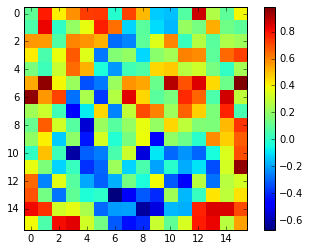

In [42]:
##Vecteur de motifs pour le 6 apres perceptron
plt.imshow(perc.w.reshape((16,16)),interpolation="nearest")
plt.colorbar()

## Extensions : linéaire... vraiment ?

Nous avons pour l'instant considérer que des séparatrices linéaires. 

1. Pourquoi à votre avis est-il utile de limiter la famille de fonctions considérée (pensez aux k-plus proches voisins) ? En quoi est-ce limitant ?

Une façon d'augmenter l'expressivité des fonctions est de transformer l'espace d'entrée par des projections. Soit $x \in \mathbb{R}^2$, et $\phi(x)=(1,x_1,x_2,x_1x_2,x_1^2,x_2^2)$ la projection polynomiale d'ordre 2.
Quelle est la forme des frontières de décision de la fonction de décision $f^\phi_\mathbf{w}(\mathbf{x})=f_\mathbf{w}(\phi(\mathbf{x}))$ ? 

1. Que doit-on changer pour adapter la descente du gradient, que ce soit dans le cas de la régression linéaire ou du perceptron ? Peut-on généraliser à des degrés supérieurs ?



Testez sur les données de type 2. 


Soit $B=\{x^1,x^2,\cdots,x^B\}$ un ensemble de points de même dimension que l'entrée, et $\phi_B(x)=(k(x,x^1),k(x,x^2),\cdots,k(x,x^B))$ la projection gaussienne sur $B$ de $x$, $k(x,x')=Ke^{\frac{\|x-x'\|^2}{\sigma^2}}$.

1. Que doit-on changer pour adapter l'algorithme du perceptron ?  Implémentez.

2. Que veut-dire un poids positif devant une composante  de cette projection ? un poids négatif  ? un poids nul ? 
3. Que se passe-t-il si beaucoup de poids sont non nuls ? nuls ? Dans quel cas la frontière est la plus complexe ? la moins ?
4. En vous inspirant de la notion de ridge regression vu en cours, que proposez vous pour régulariser ?


### Projection et perceptron

La fonction `proj_poly2(data)`  renvoie la projection polynomiale de degré 2 de la matrice d'exemples data.
Cette fonction est ensuite utilisé pour apprendre un perecptron avec une projection polynomiale. On utilise des données générés artificiellement (deux gausiennes séparables).

In [43]:
def proj_poly2(data):
    n = data.shape[0]
    return np.hstack((np.ones((n,1)), data, np.multiply(to_col(data[:,0]),to_col(data[:,1])), np.square(to_col(data[:,0])), np.square(to_col(data[:,1]))))

In [44]:
datax,datay=gen_arti(data_type=0,nbex=1000,eps=0.1)
projection=proj_poly2(datax)

0 [ 1.05353506]
100 [ 0.00534419]
200 [ 0.00203034]
300 [ 0.00140588]
400 [ 0.0011182]
500 [ 0.00097515]
600 [ 0.00087215]
700 [ 0.00079186]
800 [ 0.00072664]
900 [ 0.00066142]
Le score est  0.994


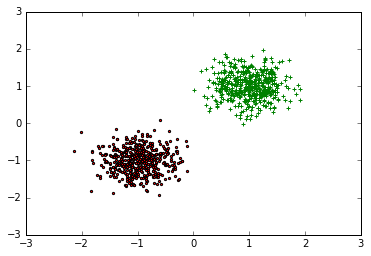

In [45]:
perceptron_ext=Perceptron(1000,1e-2)
perceptron_ext.fit(projection,datay)
perceptron_ext.score(projection,datay)
print("Le score est ",perceptron_ext.score(projection,datay))
##plot_frontiere(projection,perceptron_ext.predict,50)
plot_data(datax,datay)
plt.show()

In [87]:
from numpy import linalg

In [88]:
def similarity(K,x,x1,sigma):
    return K*exp(linalg.norm(x-x1)**2/sigma)